In [26]:
import os;
from google.colab import drive
drive.mount('/content/drive', force_remount=True);

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

plt.style.use("seaborn-ticks")

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

from scipy.signal import convolve2d

Mounted at /content/drive


In [27]:

def Eigen_faces(X_train,y_train, X_test, y_test):   

    #X_train, X_test, y_train, y_test = train_test_split(X, y);
    pca = PCA(n_components=105).fit(X_train);
    X_train_pca = pca.transform(X_train);
    classifier = SVC().fit(X_train_pca, y_train);
    X_test_pca = pca.transform(X_test);
    predictions = classifier.predict(X_test_pca);

    return  np.sum(np.array(y_test) == np.array(predictions))/len(y_test);

In [28]:
edge = 10;
kernel_zero_one = np.random.randint(0,2,(edge,edge))

In [29]:
def img_recons(X, kernel, light_level = 1, Poisson = False):
    row, col = X.shape;
    X_conv = [];
    for r in range(row):
        img = X[r,:].reshape(64,64);
        X_conv.append(convolve2d(img, kernel, mode = 'same').reshape(64*64));
    X_conv = np.array(X_conv);
    if Poisson:
        X_conv = np.random.poisson(X_conv * light_level) / light_level;
    return X_conv;



In [30]:
path = "/content/drive/Shared drives/Computational Optics Group/Yizhou_Lu_FLIM/Eigen Face";
os.chdir(path);


## convert the dataframe into np.array
df = pd.read_csv('face_data.csv');
X = df.drop('target', axis=1);
X = X.values;
y = df['target'];
y = y.values;

light_level = 1;

In [31]:
kernel = kernel_zero_one;

X_train, X_test, y_train, y_test = train_test_split(X, y);
M = np.eye(64*64)
M_inv = M;
## Recons:
X_train = img_recons( X_train, kernel, light_level, Poisson = False);
X_test = img_recons(X_test, kernel, light_level, Poisson = True);
Eigen_faces(X_train,y_train, X_test, y_test)

0.87

In [32]:
 kernel = np.ones((edge,edge));

X_train, X_test, y_train, y_test = train_test_split(X, y);
M = np.eye(64*64)
M_inv = M;
## Recons:
X_train = img_recons( X_train, kernel, light_level, Poisson = False);
X_test = img_recons(X_test, kernel, light_level, Poisson = True);
Eigen_faces(X_train,y_train, X_test, y_test)

0.91

In [33]:
def Classification_rate(light_level, kernel_size):
    rate = [];
    for n_photon in light_level:
        sub_rate = []
        for edge in kernel_size:
            kernel = np.random.randint(0,2,(edge,edge));

            X_train, X_test, y_train, y_test = train_test_split(X, y);
            ## Recons:
            X_train = img_recons( X_train, kernel, n_photon, Poisson = False);
            X_test = img_recons(X_test, kernel, n_photon, Poisson = True);
            
            sub_rate.append(Eigen_faces(X_train,y_train, X_test, y_test));
        rate.append(sub_rate);

    return rate;


In [34]:
index = np.arange(-2,10).astype(float);
light_level = np.power(10, index);
kernel_size = [3,4,5,6,7,8,9,10,11,12];

In [35]:
rate = Classification_rate(light_level, kernel_size);

In [36]:
def contour(x,y,matrix,xlabel = False, ylabel = False):
    xx,yy = np.meshgrid(x,y);
    plt.figure(facecolor='white');
    plt.contourf(xx,yy, matrix, 10, cmap=plt.cm.hot);
    plt.colorbar()
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.show();

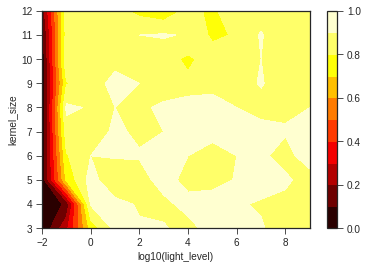

In [37]:
contour(index, kernel_size, np.array(rate).T, "log10(light_level)", "kernel_size");